In [1]:
#Import Statements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix 
from sklearn.metrics import classification_report, precision_recall_curve, auc

In [4]:
# read datafile
raw_df = pd.read_csv('C:/Users/airshu23/Desktop/Capstone2/ICPSR_20520/DS0001/Data.tsv', sep='\t')

C:\Users\airshu23\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (5,16,17,19,20,22,23,24,25,26,52,68,102,108,116,118,120,122,124,130,136,137,138,523,525,543,546,612,664) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# Establish index to CASEID
raw_df.set_index('CASEID', inplace = True)

## Data Wrangling

In [6]:
# copy into new dataframe for modification
df = raw_df.copy()

In [7]:
# get columns for entire dataset
variables = list(df.columns)

In [8]:
# convert all entries to string so that the function in the next cell runs properly
df[variables] = df[variables].astype(str)

In [9]:
#check for alphabet in column values
def check(series):
    
    if series.str.contains('[a-z]', regex = True).sum() > 0:
        return True
    return False


In [10]:
# list of columns to drop from df
dropped = []

# gather all columns with non-digit strings (a-z)
for var in variables:
    if check(df[var]) == True:
        dropped.append(var)
        
print(dropped)

['V401A', 'V401B', 'V402B', 'V404A', 'V407B', 'V408F', 'V408I', 'V408L', 'V408O', 'V409B', 'V409C', 'V410', 'V410B', 'V414A1', 'V415A1', 'V416A', 'V417A', 'V418A', 'V425A', 'V427A', 'V436A', 'V438A', 'V439A', 'V439B', 'V443A']


In [11]:
# remove variables with alphabet characters
df.drop(dropped, inplace = True, axis=1)

In [12]:
#get columns from df
cols = list(df.columns)

# convert entries to numeric
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [13]:
df.head(5)

,V1,V2,V4,V5,V7,V8,V9,V10,V11,V13,...,V448G,V448H,V448I,V448J,V448K,V448L,V448M,V448N,V449,V450
CASEID,,,,,,,,,,,,,,,,,,,,,
1,257,1,7,8,1.0,NaN,44.0,85.0,NaN,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,13.0
2,2347,1,13,9,1.0,NaN,102.0,NaN,NaN,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,12.0
3,860,1,12,9,2.0,1.0,78.0,69.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
4,5178,3,20,9,1.0,NaN,82.0,78.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0
5,1984,1,12,9,1.0,NaN,101.0,78.0,2.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,4.0


In [14]:
#non-continuous, non-ordinal variables to remove
non_numerical = ['V204', 'V278A', 'P140', 'V37', 'V263', 'V1', 'V32', 'V233', 'V62']

#percentiles of Stanford Achievement test. df has scores
redundant = ['V132', 'V134' ]

In [15]:
# remove variables with alphabet characters
df.drop(non_numerical + redundant, inplace = True, axis=1)

### Exploratory Data Analysis

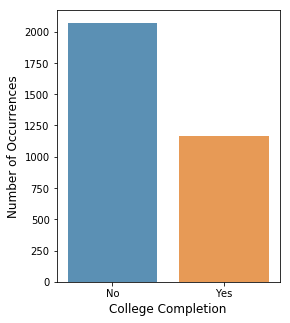

In [16]:
#Barplot of 

college_count  = df['V448M'].value_counts()
college_count.index = ['No', 'Yes']

plt.figure(figsize=(4,5))
sns.barplot(college_count.index, college_count.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('College Completion', fontsize=12)
plt.show()

In [17]:
# plot counts of college completion grouped by student's expectation

test = df[["V261","V448M"]]


In [18]:
#helper functions to convert values
def convert(value):
    if value == 1:
        return 'Yes'
    elif value == 0:
        return 'No'

def levels(value):
    if value == 1:
        return "Less than high school"
    elif value == 2:
        return "Finish high school"
    elif value == 3:
        return "Finish some college"
    elif value == 4:
        return "Finish college"
    elif value == 5:
        return "Finish a graduate degree"

In [19]:
test["Student's Expectation"] = test.loc[ : ,"V261"].apply(levels)
test["College Completion"] = test.loc[ : , "V448M"].apply(convert)

C:\Users\airshu23\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\airshu23\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


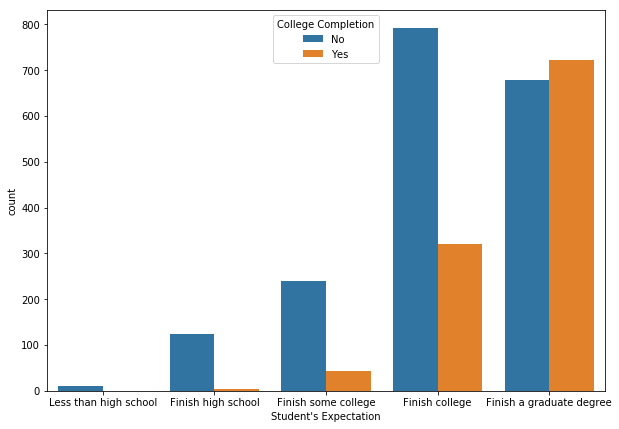

In [20]:
plt.figure(figsize=(10,7))
sns.countplot(x="Student's Expectation", hue="College Completion", order=["Less than high school", "Finish high school",
              "Finish some college", "Finish college", "Finish a graduate degree"], data=test)

plt.show()

Text(0,0.5,"Student's Expectation")

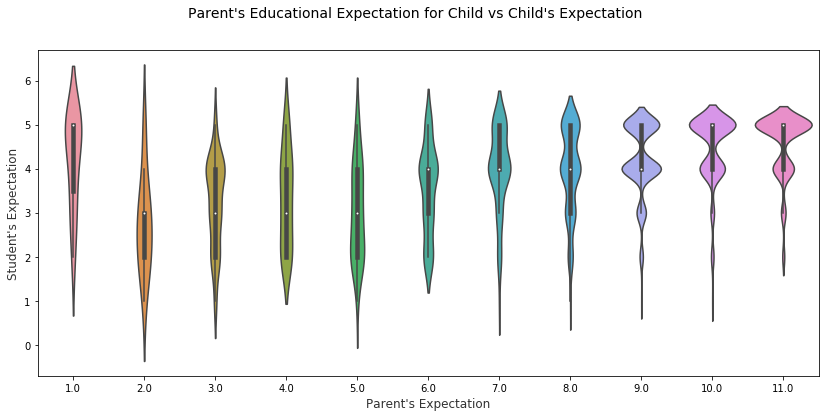

In [42]:
# Violon Plots
f, (ax) = plt.subplots(1, 1, figsize=(14, 6))
f.suptitle("Parent's Educational Expectation for Child vs Child's Expectation", fontsize=14)

sns.violinplot(x="P132", y="V261", data=df,  ax=ax)
ax.set_xlabel("Parent's Expectation",size = 12,alpha=0.8)
ax.set_ylabel("Student's Expectation",size = 12,alpha=0.8)

In [22]:
# job's prestige score Grouped by race/ethnicity

avg_by_ethnicity = df.groupby('V323A')[['V448M']].mean()

In [23]:
s = pd.Series(['White', 'Black', 'Asian', 'Multiracial', 'Hispanic', 'Nationality', 'Other'])

Text(0.5,1,'Average College Completion')

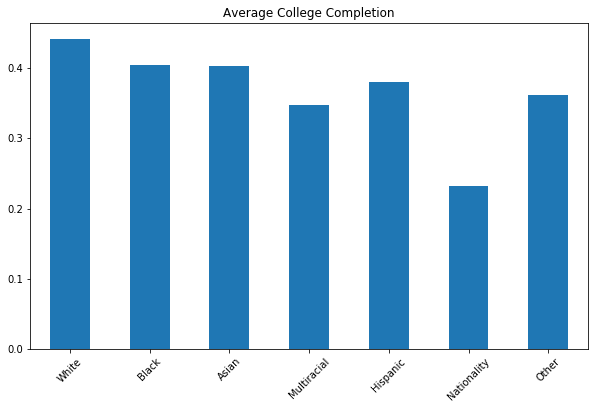

In [24]:
ax4 = avg_by_ethnicity.set_index(s).plot.bar(rot = 45, legend = False, figsize = (10,6))
ax4.set_title('Average College Completion')

### Pre-processing

<div class="span5 alert alert-info">
<font color=green>First drop 'outcome' variables from last followup survey. I am removing variables such as job prestige score and income I do not want any retrospective variables.</font>

In [98]:
features = list(df.columns)

# get index of first year 2005 follow-up variable
first_2005 = features.index('V400')

# get index of last year 2005 follow-up variable
last_2005 = features.index('V450')

In [99]:
#all variables from 2005 followup
variables_2005 = set(features[first_2005:last_2005+1])

#target variable to keep
keep_2005 = set(['V448M'])

# remove 2005 variables V448M
drop_2005 = list(variables_2005.difference(keep_2005))

#drop from column headers above
df1 = df.drop(drop_2005, axis=1)


In [100]:
print (df1.shape)

(5262, 529)


<div class="span5 alert alert-info">
<font color=green>Drop observations that do not have parental survey and college indicator.</font>

In [101]:
# remove rows that do not have target variable - college completion
df1 = df1[pd.notnull(df1['V448M'])]

# remove rows that do not have parental survey completed
df1 = df1[pd.notnull(df1['P2A'])]

In [102]:
print (df1.shape)

(1703, 529)


<div class="span5 alert alert-info">
<font color=green>Drop highly correlated features. </font>

In [103]:
# Create correlation matrix
corr_matrix = df1.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [104]:
# Drop features 
df1 = df1.drop(to_drop, axis=1)

<div class="span5 alert alert-info">
<font color=green> Removing columns that have less than 25% of the column entries filled with missing values . </font>

In [105]:
# missing values
test1 = df1.isnull().sum() / len(df1)

#all columns where number of missing values exceed 25%
testing = test1[test1>=0.25]

#columns in original df that have below 75% of values that is n/a 
below75 = list(testing.index.values)

#drop from column headers above
df2 = df1.drop(below75, axis=1)

print (df2.shape)


(1703, 401)


In [128]:
# imputing values for missing entries
df3 = df2.fillna(df2.median())

In [129]:
# Create a set of dummy variables from categorical variables
df3 = pd.get_dummies(df3, columns=['V2', 'V90','P14', 'P142'], drop_first = True)

In [130]:
#Convert original values
df3['V324E'] = np.where(df3['V324E']== 1.0, 1.0, 0.0)

#Stuff for P62D
df3['P62D'] = np.where(df3['P62D']== 1.0, 1.0, 0.0)

In [131]:
df3.isnull().values.any()

False

# Implementing Models

In [132]:
# split into feature and target variable

X = df3.drop('V448M', axis = 1)
y = df3['V448M']

In [133]:
#split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=77)

In [134]:
# Create standardizer
standardizer = StandardScaler()

# Fit standardizer to training set 
standardizer.fit(X_train)

# Apply to both training and test sets to be used in Random Forest Model
X_train_std = standardizer.transform(X_train)
X_test_std = standardizer.transform(X_test)

## Dimensionality Reduction using Recursive Feature Elimination

<div class="span5 alert alert-info">
<font color=green> Choosing 20 variables that produce the best results. Logistic regression is as used as input inside recursive feature elimination function. </font>

In [135]:
logit = LogisticRegression(C=1e8) ## chose high c-value to match results from statsmodels logistic regression
rfe = RFE(logit, 20)
rfe = rfe.fit(X_train, y_train)

In [136]:
# get indices of columns chosen in step above
col_indices = rfe.get_support(indices=True).tolist()

#Select only the top 20 variables from orignial dataframe
X_train_reduced = X_train.iloc[:, col_indices]
X_test_reduced = X_test.iloc[:, col_indices]

## Logistic Model 

In [150]:
# logistic model with constant term

X_const = sm.add_constant(X_train_reduced)
logit_model= sm.Logit(y_train, X_const)
result=logit_model.fit()

C:\Users\airshu23\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


Optimization terminated successfully.
         Current function value: 0.525579
         Iterations 9


In [138]:
logreg = LogisticRegression(C=1e8) ## chose high c-value to match results from statsmodels logistic regression

# Fit the classifier to the training data
logreg.fit(X_train_reduced, y_train)

LogisticRegression(C=100000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

<div class="span5 alert alert-info">
<font color=green> Displaying results of scikit learn's and Statsmodel's implementation of logistic model below to demonstrate rough equivalency. </font>

In [215]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  V448M   No. Observations:                 1362
Model:                          Logit   Df Residuals:                     1342
Method:                           MLE   Df Model:                           19
Date:                Sat, 30 Mar 2019   Pseudo R-squ.:                  0.2079
Time:                        01:47:37   Log-Likelihood:                -715.84
converged:                       True   LL-Null:                       -903.69
                                        LLR p-value:                 4.887e-68
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
V25           -1.1479      0.338     -3.393      0.001      -1.811      -0.485
V74F           0.5472      0.239      2.288      0.022       0.078       1.016
V114          -0.1956      0.151     -1.299      0.194      -0.491       0.099
V116          -0.1046      0.123     -0.850      0.395      -0.346       0.136
V288           7.2405      8.583      0.844      0.399      -9.582      24.063
V289           7.2972      8.596      0.849      0.396      -9.550      24.144
V290           7.2989      8.586      0.850      0.395      -9.528      24.126
V291          -0.8981      0.391     -2.297      0.022      -1.664      -0.132
V292          -0.8286      0.389     -2.128      0.033      -1.592      -0.065
V293          -0.9315      0.391     -2.381      0.017      -1.698      -0.165
V324E         -0.7321      0.268     -2.727      0.006      -1.258      -0.206
V332           1.2080      0.091     13.260      0.000       1.029       1.387
V337          -0.7311      0.409     -1.788      0.074      -1.532       0.070
P1             6.9569      5.787      1.202      0.229      -4.386      18.300
C4             1.7541      0.355      4.941      0.000       1.058       2.450
C14            0.2637      0.253      1.043      0.297      -0.232       0.759
C18          -21.6147     25.759     -0.839      0.401     -72.101      28.871
C19           -2.5929      1.152     -2.251      0.024      -4.851      -0.335
V2_4          -1.2382      0.151     -8.190      0.000      -1.534      -0.942
P14_3.0       -1.2512      0.864     -1.449      0.147      -2.944       0.441
==============================================================================
"""

In [205]:
# the two variables used in logistic model
used_columns = X_train_reduced.columns.values

# only p-values significant at 5% (indexed by column name)
p_val = result.pvalues.loc[result.pvalues <= 0.05]

In [260]:
# list of column names 
p_val_idx = p_val.index.tolist()

true_idx = [i for i in range(len(used_columns)) if used_columns[i] in p_val_idx]

In [264]:
logit_results = pd.DataFrame({'Statsmodel Coefficients' : np.round(coeff[true_idx], 5),
                               'P-Values': P_val_list})

In [265]:
print (logit_results)

       Statsmodel Coefficients     P-Values:
V25                   -1.14793  6.912039e-04
V74F                   0.54725  2.213236e-02
V291                  -0.89812  2.161620e-02
V292                  -0.82856  3.333917e-02
V293                  -0.93151  1.727905e-02
V324E                 -0.73208  6.381720e-03
V332                   1.20798  3.973826e-40
C4                     1.75407  7.767093e-07
C19                   -2.59290  2.439170e-02
V2_4                  -1.23819  2.608198e-16


<div class="span5 alert alert-info">
<font color=green> The table above provides interesting results. Factors that raise the chance of completing college are if your friend's parents are from China/Taiwan, GPA, and english knowledge (measured in middle school). Factors that have a negative correlation are ordinal measure indicating attitude towards helping relative over friend (higher points for disagreement), ordinal measure indicating whether it is preferable to find a job near your parents(higher points for disagreement), serious illness/diability and growing up in San Diego.  </font>

#### Evaluating model performance

In [267]:
y_pred = logreg.predict(X_test_reduced)

In [ ]:
score = accuracy_score(y_test, y_pred)

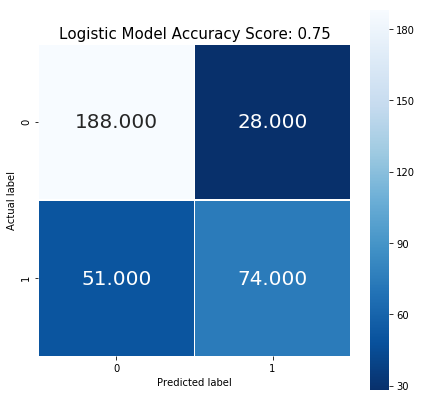

In [268]:
# Compute and visualize confusion matrix 
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True,  annot_kws={"size": 20}, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Logistic Model Accuracy Score: {:.2f}'.format(score)

plt.title(all_sample_title, size = 15)
plt.show()

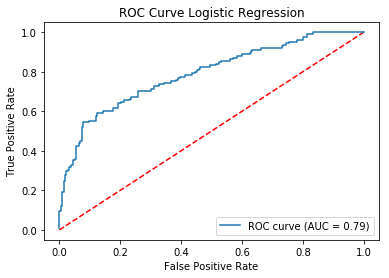

In [154]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test_reduced)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Logistic Regression')
plt.legend(loc='lower right')
plt.show()

# Random Forest Model

In [157]:
# Instantiate
rf = RandomForestClassifier(n_estimators=10000)  

# Fit using scaled features
rf_model = rf.fit(X_train_std, y_train) 


In [123]:
# Predict the labels of the test set: y_pred
y_pred_rf = rf_model.predict(X_test_std)

In [158]:
# Use score method to get accuracy of model
score_rf = rf_model.score(X_test_std, y_test)


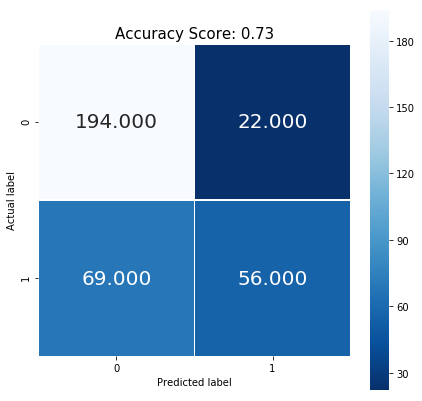

In [149]:
# Compute and visualize confusion matrix 
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(7,7))
sns.heatmap(cm_rf, annot=True,  annot_kws={"size": 20}, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Random Forest - Accuracy Score: {:.2f}'.format(score_rf)

plt.title(all_sample_title, size = 25)
plt.show()


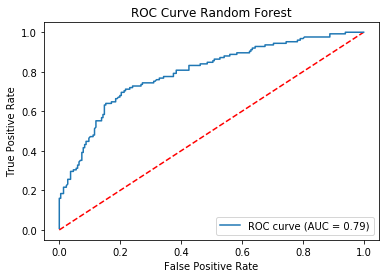

In [159]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob_rf = rf_model.predict_proba(X_test_std)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)

auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'r--')

plt.plot(fpr_rf, tpr_rf, label = 'ROC curve (AUC = %0.2f)' % auc_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Random Forest')
plt.legend(loc='lower right')
plt.show()

<div class="span5 alert alert-info">
<font color=green> Selecting 20 variables that appear most frequently in random forests. </font>

In [168]:
importances = rf_model.feature_importances_

# get column names of top 20 features in ascending order
indices = importances.argsort()[-20:][::-1].tolist()
top20 = X_train.columns[indices][::-1].tolist()

In [185]:
column_names = ['Total Family Income', 'White Student Percentage', 'Relatives In County', 'Parent Education Level',
                'Self Esteem Scale', 'Desired Job Prestige score', 'Parent Arrival Year', 'Desired Job SEI score',
                'Friends Full-time Job Post-HS',"Parent's Education Expectation", 'Parent Monthly Earnings', 
                'Subsidized School Lunch Eligibility %', 'Respondent Educational Expectation', "Father Occupational Prestige",
                "Father's SEI score", 'Parent SES Index', 'Stanford Reading score', 'Stanford math score', 
                'Middle School GPA', 'High School GPA']

column_names = column_names[::-1]

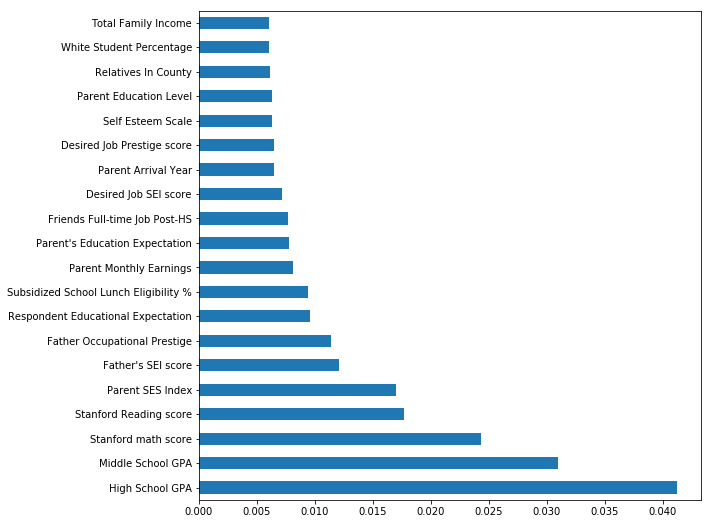

In [186]:
feat_importances = pd.Series(importances[indices], index= column_names)
feat_importances.plot(kind='barh', figsize = (9,9))